
# Prediksi Distribusi Pekerjaan Menggunakan Metode Monte Carlo

**Deskripsi Studi Kasus:**
Memprediksi distribusi jenis pekerjaan di masa depan berdasarkan data historis menggunakan metode Monte Carlo. Dataset mengandung informasi administratif dan jumlah penduduk berdasarkan jenis pekerjaan.

**Dataset Kolom:**
- id: Identifikasi unik
- kode_provinsi, nama_provinsi: Informasi provinsi
- bps_kode_kabupaten_kota, bps_nama_kabupaten_kota: Informasi kota/kabupaten
- bps_kode_kecamatan, bps_nama_kecamatan: Informasi kecamatan
- bps_kode_desa_kelurahan, bps_desa_kelurahan: Informasi desa/kelurahan
- kemendagri_kode_kecamatan, kemendagri_nama_kecamatan: Kode Kementerian Dalam Negeri
- kemendagri_kode_desa_kelurahan, kemendagri_nama_desa_kelurahan
- jenis_pekerjaan: Kategori pekerjaan
- jumlah_penduduk: Jumlah penduduk dengan pekerjaan tersebut
- satuan: Unit pengukuran
- semester: Semester (1 atau 2)
- tahun: Tahun data


In [27]:
# %% [markdown]
"""
# 📊 Prediksi Distribusi Pekerjaan dengan Monte Carlo

**Deskripsi:** 
Memprediksi distribusi jenis pekerjaan di Kota Bandung menggunakan metode Monte Carlo berdasarkan data historis.

**Dataset:** `data/raw/jumlah_penduduk_kota_bandung_berdasarkan_jenis_pekerjaan.csv`
"""

# %%
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Visualisasi interaktif
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Konfigurasi tampilan
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [28]:
# %%
# Load dataset
try:
    df = pd.read_csv('data/raw/jumlah_penduduk_kota_bandung_berdasarkan_jenis_pekerjaan.csv')
    print(f"Data loaded successfully! Shape: {df.shape}")
except FileNotFoundError:
    print("File not found! Please check the path.")
    df = pd.DataFrame()

# %%
# Tampilkan informasi dasar
print("\nDataset Information:")
print("=" * 50)
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"\nColumn Names: {list(df.columns)}")

# %%
# Tampilkan 5 baris pertama
print("\nFirst 5 rows:")
display(df.head())

# %%
# Cek tipe data dan missing values
print("\nData Types and Missing Values:")
print(df.info())

# %%
# Statistik deskriptif
print("\nDescriptive Statistics:")
display(df.describe())

# %%
# Cek nilai unik untuk kolom penting
print("\nUnique Values:")
important_cols = ['tahun', 'semester', 'jenis_pekerjaan', 'nama_provinsi', 'bps_nama_kabupaten_kota']
for col in important_cols:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count} unique values")
        if unique_count < 20:
            print(f"   Values: {df[col].unique()}")

Data loaded successfully! Shape: (24915, 18)

Dataset Information:
Rows: 24915
Columns: 18

Column Names: ['id', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kabupaten_kota', 'bps_nama_kabupaten_kota', 'bps_kode_kecamatan', 'bps_nama_kecamatan', 'bps_kode_desa_kelurahan', 'bps_desa_kelurahan', 'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan', 'kemendagri_kode_desa_kelurahan', 'kemendagri_nama_desa_kelurahan', 'jenis_pekerjaan', 'jumlah_penduduk', 'satuan', 'semester', 'tahun']

First 5 rows:


,id,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,jenis_pekerjaan,jumlah_penduduk,satuan,semester,tahun
0,1,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250003,SUKASARI,32.73.01,SUKASARI,32.73.01.1002,GEGERKALONG,BELUM BEKERJA,3274,ORANG,1,2017
1,2,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250003,SUKASARI,32.73.01,SUKASARI,32.73.01.1002,GEGERKALONG,APARATUR PEJABAT NEGARA,1140,ORANG,1,2017
2,3,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250003,SUKASARI,32.73.01,SUKASARI,32.73.01.1002,GEGERKALONG,TENAGA PENGAJAR,293,ORANG,1,2017
3,4,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250003,SUKASARI,32.73.01,SUKASARI,32.73.01.1002,GEGERKALONG,WIRASWASTA,6904,ORANG,1,2017
4,5,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250003,SUKASARI,32.73.01,SUKASARI,32.73.01.1002,GEGERKALONG,PERTANIAN DAN PETERNAKAN,17,ORANG,1,2017



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24915 entries, 0 to 24914
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              24915 non-null  int64 
 1   kode_provinsi                   24915 non-null  int64 
 2   nama_provinsi                   24915 non-null  object
 3   bps_kode_kabupaten_kota         24915 non-null  int64 
 4   bps_nama_kabupaten_kota         24915 non-null  object
 5   bps_kode_kecamatan              24915 non-null  int64 
 6   bps_nama_kecamatan              24915 non-null  object
 7   bps_kode_desa_kelurahan         24915 non-null  int64 
 8   bps_desa_kelurahan              24915 non-null  object
 9   kemendagri_kode_kecamatan       24915 non-null  object
 10  kemendagri_nama_kecamatan       24915 non-null  object
 11  kemendagri_kode_desa_kelurahan  24915 non-null  object
 12  kemendagri_nam

,id,kode_provinsi,bps_kode_kabupaten_kota,bps_kode_kecamatan,bps_kode_desa_kelurahan,jumlah_penduduk,semester,tahun
count,24915.000000,24915.0,24915.0,2.491500e+04,2.491500e+04,24915.000000,24915.000000,24915.000000
mean,12458.000000,32.0,3273.0,3.273126e+06,3.273126e+09,1476.357817,1.466667,2020.400000
std,7192.485315,0.0,0.0,7.175884e+01,7.174655e+04,2209.061386,0.498898,2.388911
min,1.000000,32.0,3273.0,3.273010e+06,3.273010e+09,0.000000,1.000000,2017.000000
25%,6229.500000,32.0,3273.0,3.273060e+06,3.273060e+09,11.000000,1.000000,2018.000000
50%,12458.000000,32.0,3273.0,3.273121e+06,3.273121e+09,187.000000,1.000000,2020.000000
75%,18686.500000,32.0,3273.0,3.273180e+06,3.273180e+09,2527.000000,2.000000,2022.000000
max,24915.000000,32.0,3273.0,3.273260e+06,3.273260e+09,18693.000000,2.000000,2025.000000



Unique Values:
tahun: 9 unique values
   Values: [2017 2018 2019 2020 2021 2022 2023 2024 2025]
semester: 2 unique values
   Values: [1 2]
jenis_pekerjaan: 27 unique values
nama_provinsi: 1 unique values
   Values: ['JAWA BARAT']
bps_nama_kabupaten_kota: 1 unique values
   Values: ['KOTA BANDUNG']


In [29]:
# %%
class DataPreprocessor:
    def __init__(self, df):
        self.df = df.copy()
        
    def clean_data(self):
        """Cleaning data dasar"""
        print("🧹 Cleaning data...")
        
        # 1. Standardize column names
        self.df.columns = [col.lower().strip() for col in self.df.columns]
        
        # 2. Handle missing values untuk kolom numerik
        if 'jumlah_penduduk' in self.df.columns:
            self.df['jumlah_penduduk'] = pd.to_numeric(self.df['jumlah_penduduk'], errors='coerce')
            self.df['jumlah_penduduk'].fillna(0, inplace=True)
        
        if 'tahun' in self.df.columns:
            self.df['tahun'] = pd.to_numeric(self.df['tahun'], errors='coerce')
            self.df = self.df[self.df['tahun'].notna()]
            self.df['tahun'] = self.df['tahun'].astype(int)
        
        # 3. Standardize job types
        if 'jenis_pekerjaan' in self.df.columns:
            self.df['jenis_pekerjaan'] = self.df['jenis_pekerjaan'].astype(str).str.strip().str.title()
        
        print(f"Cleaning complete. Shape: {self.df.shape}")
        return self
    
    def aggregate_data(self):
        """Agregasi data per tahun dan jenis pekerjaan"""
        print("\nAggregating data...")
        
        # Group by tahun dan jenis pekerjaan
        aggregated = self.df.groupby(['tahun', 'jenis_pekerjaan'])['jumlah_penduduk'].sum().reset_index()
        
        # Sort by tahun
        aggregated = aggregated.sort_values('tahun')
        
        # Hitung total per tahun
        yearly_totals = aggregated.groupby('tahun')['jumlah_penduduk'].sum().reset_index()
        yearly_totals.columns = ['tahun', 'total_population']
        
        # Gabungkan dengan data asli
        aggregated = pd.merge(aggregated, yearly_totals, on='tahun')
        
        # Hitung persentase
        aggregated['percentage'] = (aggregated['jumlah_penduduk'] / aggregated['total_population']) * 100
        
        print(f"Aggregation complete. Shape: {aggregated.shape}")
        return aggregated
    
    def get_processed_data(self):
        """Return data yang telah diproses"""
        cleaned_df = self.clean_data().df
        aggregated_df = self.aggregate_data()
        return cleaned_df, aggregated_df

# %%
# Jalankan preprocessing
preprocessor = DataPreprocessor(df)
df_clean, df_agg = preprocessor.get_processed_data()

# %%
# Tampilkan data hasil agregasi
print("Aggregated Data Sample:")
display(df_agg.head(10))

# %%
# Summary statistik agregasi
print("\nAggregation Summary:")
print(f"Total years: {df_agg['tahun'].nunique()}")
print(f"Total job types: {df_agg['jenis_pekerjaan'].nunique()}")
print(f"Data range: {df_agg['tahun'].min()} - {df_agg['tahun'].max()}")
print(f"Total records in aggregated data: {len(df_agg)}")

🧹 Cleaning data...
Cleaning complete. Shape: (24915, 18)

Aggregating data...
Aggregation complete. Shape: (104, 5)
Aggregated Data Sample:


,tahun,jenis_pekerjaan,jumlah_penduduk,total_population,percentage
0,2017,Agama Dan Kepercayaan,1726,4817047,0.035831
1,2017,Aparatur Pejabat Negara,162912,4817047,3.381989
2,2017,Belum Bekerja,808940,4817047,16.793276
3,2017,Lainnya,1075290,4817047,22.322597
4,2017,Nelayan,91,4817047,0.001889
5,2017,Pelajar Dan Mahasiswa,1059084,4817047,21.986167
6,2017,Pensiunan,84545,4817047,1.755121
7,2017,Pertanian Dan Peternakan,2972,4817047,0.061698
8,2017,Tenaga Kesehatan,13597,4817047,0.282268
9,2017,Tenaga Pengajar,38253,4817047,0.794117



Aggregation Summary:
Total years: 9
Total job types: 27
Data range: 2017 - 2025
Total records in aggregated data: 104


EXPLORATORY DATA ANALYSIS


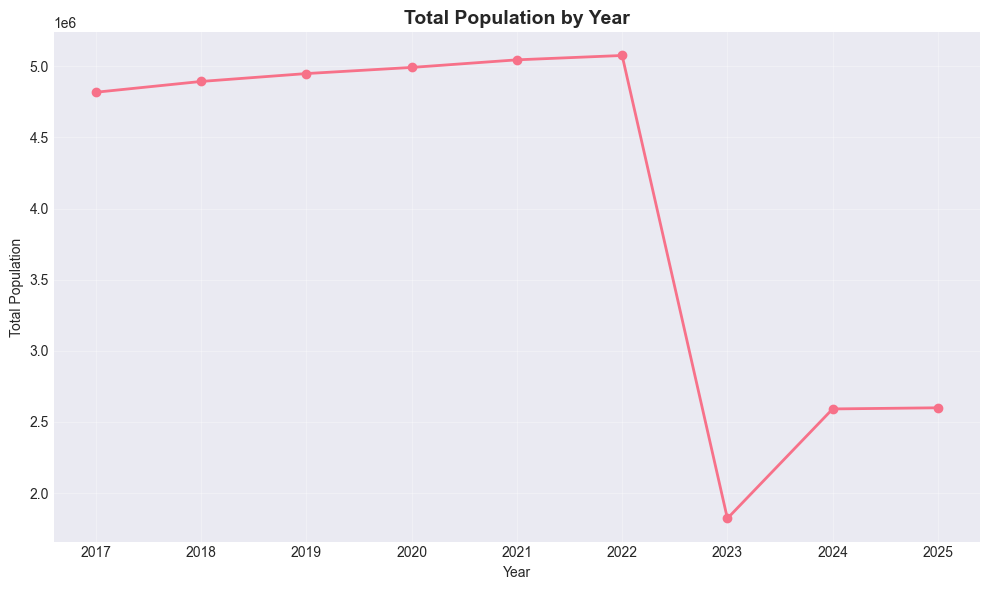

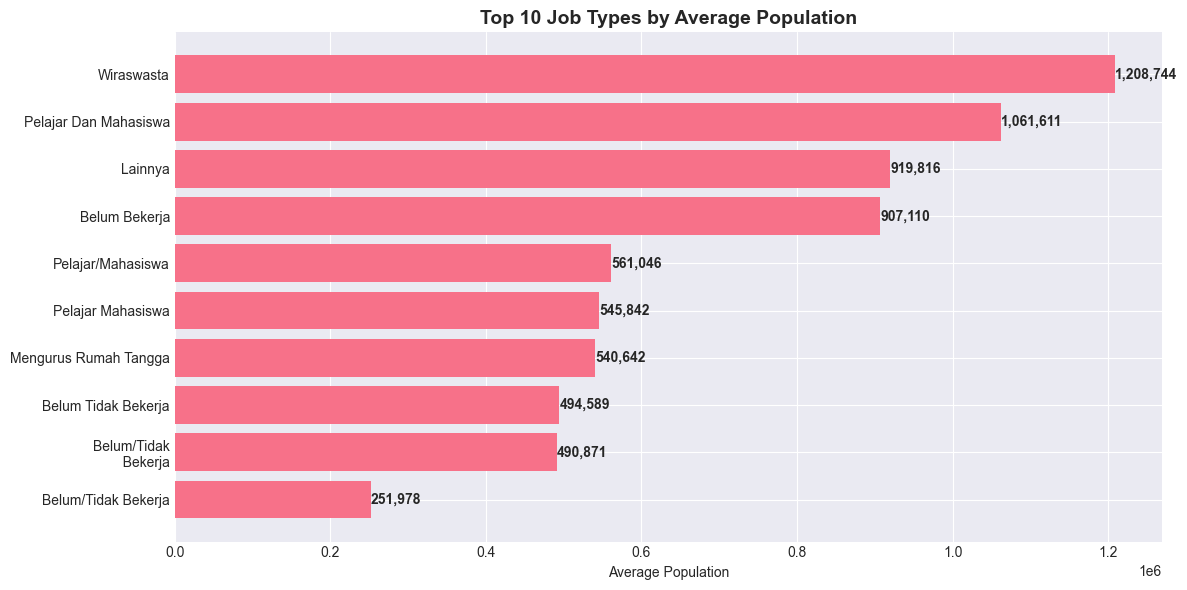

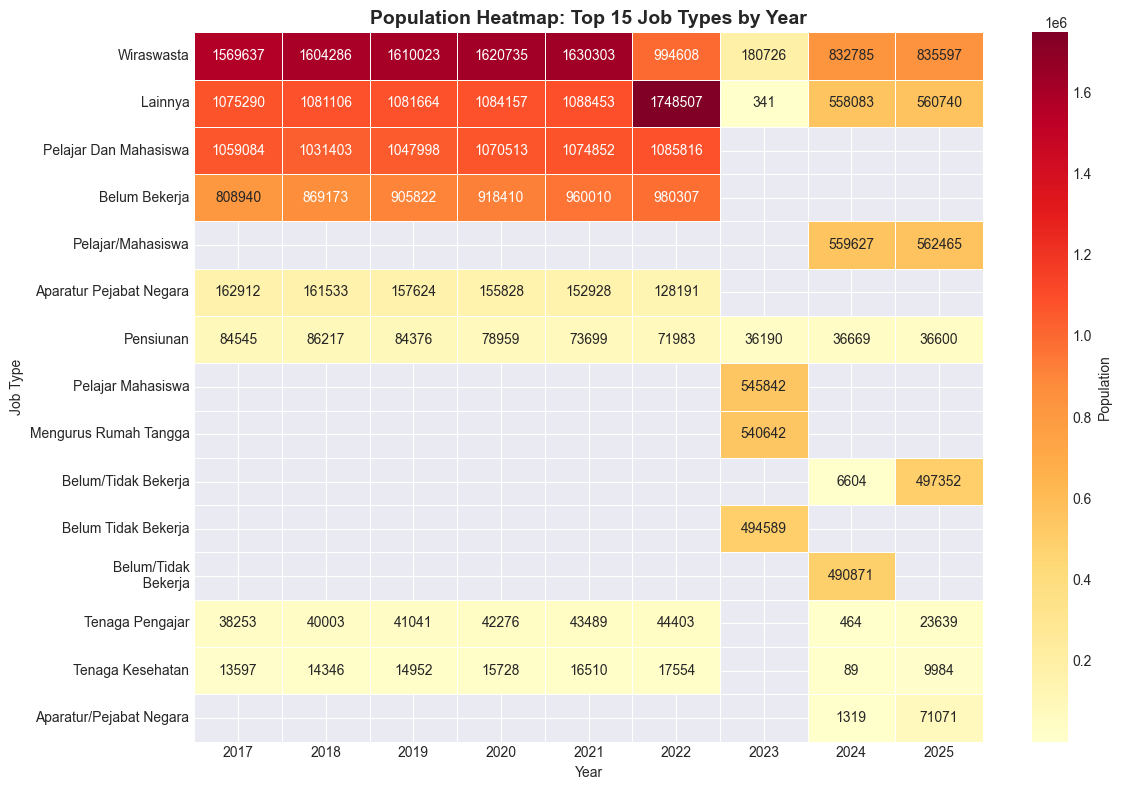


Growth Rate Analysis:

Top 5 Fastest Growing Jobs:


,first_population,last_population,growth_rate
jenis_pekerjaan,,,
Tenaga Kesehatan,13597.0,9984.0,-26.57
Tenaga Pengajar,38253.0,23639.0,-38.20
Agama Dan Kepercayaan,1726.0,942.0,-45.42
Wiraswasta,1569637.0,835597.0,-46.76
Lainnya,1075290.0,560740.0,-47.85



Top 5 Slowest Growing/Declining Jobs:


,first_population,last_population,growth_rate
jenis_pekerjaan,,,
Pensiunan,84545.0,36600.0,-56.71
Nelayan,91.0,42.0,-53.85
Lainnya,1075290.0,560740.0,-47.85
Wiraswasta,1569637.0,835597.0,-46.76
Agama Dan Kepercayaan,1726.0,942.0,-45.42


In [30]:
# %%
print("EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# %%
# 1. Total populasi per tahun
plt.figure(figsize=(10, 6))
yearly_total = df_agg.groupby('tahun')['jumlah_penduduk'].sum()
plt.plot(yearly_total.index, yearly_total.values, marker='o', linewidth=2)
plt.title('Total Population by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# 2. Top 10 jenis pekerjaan (rata-rata)
job_avg = df_agg.groupby('jenis_pekerjaan')['jumlah_penduduk'].mean().sort_values(ascending=False)
top_10_jobs = job_avg.head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(top_10_jobs)), top_10_jobs.values)
plt.yticks(range(len(top_10_jobs)), top_10_jobs.index)
plt.title('Top 10 Job Types by Average Population', fontsize=14, fontweight='bold')
plt.xlabel('Average Population')
plt.gca().invert_yaxis()

# Tambahkan nilai di bar
for i, (bar, value) in enumerate(zip(bars, top_10_jobs.values)):
    plt.text(value, i, f'{value:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# %%
# 3. Distribusi per tahun (heatmap)
# Pivot table untuk heatmap
pivot_data = df_agg.pivot_table(values='jumlah_penduduk', 
                                index='jenis_pekerjaan', 
                                columns='tahun', 
                                aggfunc='sum')

# Ambil top 15 job untuk visualisasi
top_jobs = df_agg.groupby('jenis_pekerjaan')['jumlah_penduduk'].sum().nlargest(15).index
pivot_top = pivot_data.loc[top_jobs]

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_top, annot=True, fmt='.0f', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Population'})
plt.title('Population Heatmap: Top 15 Job Types by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Job Type')
plt.tight_layout()
plt.show()

# %%
# 4. Growth rate per jenis pekerjaan
print("\nGrowth Rate Analysis:")

# Filter data untuk tahun pertama dan terakhir
first_year = df_agg['tahun'].min()
last_year = df_agg['tahun'].max()

first_year_data = df_agg[df_agg['tahun'] == first_year].set_index('jenis_pekerjaan')['jumlah_penduduk']
last_year_data = df_agg[df_agg['tahun'] == last_year].set_index('jenis_pekerjaan')['jumlah_penduduk']

# Hitung growth rate
growth_data = pd.DataFrame({
    'first_year': first_year,
    'first_population': first_year_data,
    'last_year': last_year,
    'last_population': last_year_data
}).dropna()

growth_data['growth_rate'] = ((growth_data['last_population'] - growth_data['first_population']) / 
                               growth_data['first_population']) * 100

# Top 5 growth
top_growth = growth_data.nlargest(5, 'growth_rate')
print("\nTop 5 Fastest Growing Jobs:")
display(top_growth[['first_population', 'last_population', 'growth_rate']].round(2))

# Bottom 5 growth
bottom_growth = growth_data.nsmallest(5, 'growth_rate')
print("\nTop 5 Slowest Growing/Declining Jobs:")
display(bottom_growth[['first_population', 'last_population', 'growth_rate']].round(2))

In [31]:
# %%
print("\nMONTE CARLO SIMULATION")
print("=" * 50)

# %%
class MonteCarloPredictor:
    def __init__(self, df_agg):
        self.df_agg = df_agg
        self.historical_stats = {}
        self.predictions = {}
        
    def calculate_historical_stats(self, job_type):
        """Hitung statistik historis untuk jenis pekerjaan tertentu"""
        job_data = self.df_agg[self.df_agg['jenis_pekerjaan'] == job_type]
        
        if len(job_data) < 2:
            return None
        
        # Sort by tahun
        job_data = job_data.sort_values('tahun')
        years = job_data['tahun'].values
        populations = job_data['jumlah_penduduk'].values
        
        # Hitung growth rates
        growth_rates = []
        for i in range(1, len(populations)):
            growth = (populations[i] - populations[i-1]) / populations[i-1]
            growth_rates.append(growth)
        
        stats = {
            'years': years,
            'populations': populations,
            'current_population': populations[-1],
            'current_year': years[-1],
            'mean_growth': np.mean(growth_rates),
            'std_growth': np.std(growth_rates) if len(growth_rates) > 1 else 0.05,
            'n_years': len(years)
        }
        
        self.historical_stats[job_type] = stats
        return stats
    
    def predict_job_growth(self, job_type, target_year=2030, n_simulations=10000, confidence_level=0.95):
        """Prediksi pertumbuhan menggunakan Monte Carlo"""
        print(f"\nPredicting: {job_type}")
        
        # Hitung statistik historis
        if job_type not in self.historical_stats:
            stats = self.calculate_historical_stats(job_type)
            if stats is None:
                print(f"Insufficient data for {job_type}")
                return None
        else:
            stats = self.historical_stats[job_type]
        
        # Parameter simulasi
        years_to_predict = target_year - stats['current_year']
        if years_to_predict <= 0:
            print(f"Target year must be greater than {stats['current_year']}")
            return None
        
        # Inisialisasi array untuk simulasi
        simulations = np.zeros((n_simulations, years_to_predict + 1))
        simulations[:, 0] = stats['current_population']
        
        # Generate random growth rates
        growth_rates = np.random.normal(
            stats['mean_growth'],
            stats['std_growth'],
            (n_simulations, years_to_predict)
        )
        
        # Batasi growth rates yang ekstrim
        growth_rates = np.clip(growth_rates, -0.5, 1.0)
        
        # Jalankan simulasi
        for year in range(years_to_predict):
            simulations[:, year + 1] = simulations[:, year] * (1 + growth_rates[:, year])
        
        # Hitung statistik prediksi
        final_predictions = simulations[:, -1]
        
        # Hitung percentiles untuk confidence interval
        alpha = 1 - confidence_level
        lower_percentile = (alpha / 2) * 100
        upper_percentile = 100 - (alpha / 2)
        
        prediction_stats = {
            'job_type': job_type,
            'current_year': stats['current_year'],
            'current_population': stats['current_population'],
            'target_year': target_year,
            'n_simulations': n_simulations,
            'mean_prediction': np.mean(final_predictions),
            'median_prediction': np.median(final_predictions),
            'std_prediction': np.std(final_predictions),
            'ci_lower': np.percentile(final_predictions, lower_percentile),
            'ci_upper': np.percentile(final_predictions, upper_percentile),
            'min_prediction': np.min(final_predictions),
            'max_prediction': np.max(final_predictions),
            'cagr': ((np.mean(final_predictions) / stats['current_population']) ** 
                    (1/years_to_predict) - 1) * 100
        }
        
        self.predictions[job_type] = {
            'stats': prediction_stats,
            'simulations': simulations,
            'growth_rates': growth_rates
        }
        
        # Tampilkan hasil
        print(f"   Current ({stats['current_year']}): {stats['current_population']:,.0f}")
        print(f"   Predicted ({target_year}): {prediction_stats['mean_prediction']:,.0f}")
        print(f"   CAGR: {prediction_stats['cagr']:.2f}%")
        print(f"   95% CI: [{prediction_stats['ci_lower']:,.0f}, {prediction_stats['ci_upper']:,.0f}]")
        
        return prediction_stats
    
    def predict_all_jobs(self, target_year=2030, n_simulations=5000, top_n=10):
        """Prediksi untuk semua jenis pekerjaan (top N terbesar)"""
        print(f"\nPredicting top {top_n} job types...")
        
        # Cari top N job berdasarkan populasi terkini
        current_year = self.df_agg['tahun'].max()
        current_data = self.df_agg[self.df_agg['tahun'] == current_year]
        top_jobs = current_data.nlargest(top_n, 'jumlah_penduduk')['jenis_pekerjaan'].tolist()
        
        all_predictions = []
        
        for job in top_jobs:
            try:
                prediction = self.predict_job_growth(
                    job_type=job,
                    target_year=target_year,
                    n_simulations=n_simulations,
                    confidence_level=0.95
                )
                if prediction:
                    all_predictions.append(prediction)
            except Exception as e:
                print(f"Error predicting {job}: {str(e)}")
        
        return pd.DataFrame(all_predictions)

# %%
# Inisialisasi predictor
predictor = MonteCarloPredictor(df_agg)

# %%
# Prediksi untuk satu contoh job type
sample_job = df_agg['jenis_pekerjaan'].iloc[0]
print(f"Sample prediction for: {sample_job}")

sample_prediction = predictor.predict_job_growth(
    job_type=sample_job,
    target_year=2030,
    n_simulations=10000
)

# %%
# Prediksi untuk top 10 job types
print("\n" + "="*50)
all_predictions_df = predictor.predict_all_jobs(
    target_year=2030,
    n_simulations=5000,
    top_n=10
)

# %%
# Tampilkan hasil prediksi dalam tabel
if not all_predictions_df.empty:
    print("\nPREDICTION RESULTS SUMMARY")
    print("="*60)
    
    # Format DataFrame untuk display
    display_df = all_predictions_df[[
        'job_type', 
        'current_population', 
        'mean_prediction', 
        'cagr', 
        'ci_lower', 
        'ci_upper'
    ]].copy()
    
    display_df['current_population'] = display_df['current_population'].apply(lambda x: f"{x:,.0f}")
    display_df['mean_prediction'] = display_df['mean_prediction'].apply(lambda x: f"{x:,.0f}")
    display_df['cagr'] = display_df['cagr'].apply(lambda x: f"{x:.2f}%")
    display_df['ci_lower'] = display_df['ci_lower'].apply(lambda x: f"{x:,.0f}")
    display_df['ci_upper'] = display_df['ci_upper'].apply(lambda x: f"{x:,.0f}")
    
    display_df.columns = ['Job Type', 'Current Pop', 'Predicted 2030', 'CAGR', 'CI Lower', 'CI Upper']
    
    display(display_df)


MONTE CARLO SIMULATION
Sample prediction for: Agama Dan Kepercayaan

Predicting: Agama Dan Kepercayaan
   Current (2025): 942
   Predicted (2030): 6,702
   CAGR: 48.06%
   95% CI: [118, 30,144]


Predicting top 10 job types...

Predicting: Wiraswasta
   Current (2025): 835,597
   Predicted (2030): 2,890,463
   CAGR: 28.17%
   95% CI: [104,450, 26,739,104]

Predicting: Pelajar/Mahasiswa
   Current (2025): 562,465
   Predicted (2030): 577,069
   CAGR: 0.51%
   95% CI: [461,305, 827,459]

Predicting: Lainnya
   Current (2025): 560,740
   Predicted (2030): 4,029,488
   CAGR: 48.35%
   95% CI: [70,092, 17,943,680]

Predicting: Belum/Tidak Bekerja
   Current (2025): 497,352
   Predicted (2030): 15,915,264
   CAGR: 100.00%
   95% CI: [15,915,264, 15,915,264]

Predicting: Aparatur/Pejabat Negara
   Current (2025): 71,071
   Predicted (2030): 2,274,272
   CAGR: 100.00%
   95% CI: [2,274,272, 2,274,272]

Predicting: Pensiunan
   Current (2025): 36,600
   Predicted (2030): 24,004
   CAGR: -8.09%

,Job Type,Current Pop,Predicted 2030,CAGR,CI Lower,CI Upper
0,Wiraswasta,"835,597","2,890,463",28.17%,"104,450","26,739,104"
1,Pelajar/Mahasiswa,"562,465","577,069",0.51%,"461,305","827,459"
2,Lainnya,"560,740","4,029,488",48.35%,"70,092","17,943,680"
3,Belum/Tidak Bekerja,"497,352","15,915,264",100.00%,"15,915,264","15,915,264"
4,Aparatur/Pejabat Negara,"71,071","2,274,272",100.00%,"2,274,272","2,274,272"
5,Pensiunan,"36,600","24,004",-8.09%,"9,648","74,046"
6,Tenaga Pengajar,"23,639","165,352",47.56%,"2,955","756,448"
7,Tenaga Kesehatan,"9,984","73,393",49.03%,"1,248","319,488"
8,Pertanian/Peternakan,"1,311","1,283",-0.43%,"1,021","1,799"
9,Agama Dan Kepercayaan,942,"6,794",48.46%,118,"30,144"



VISUALIZATION OF RESULTS


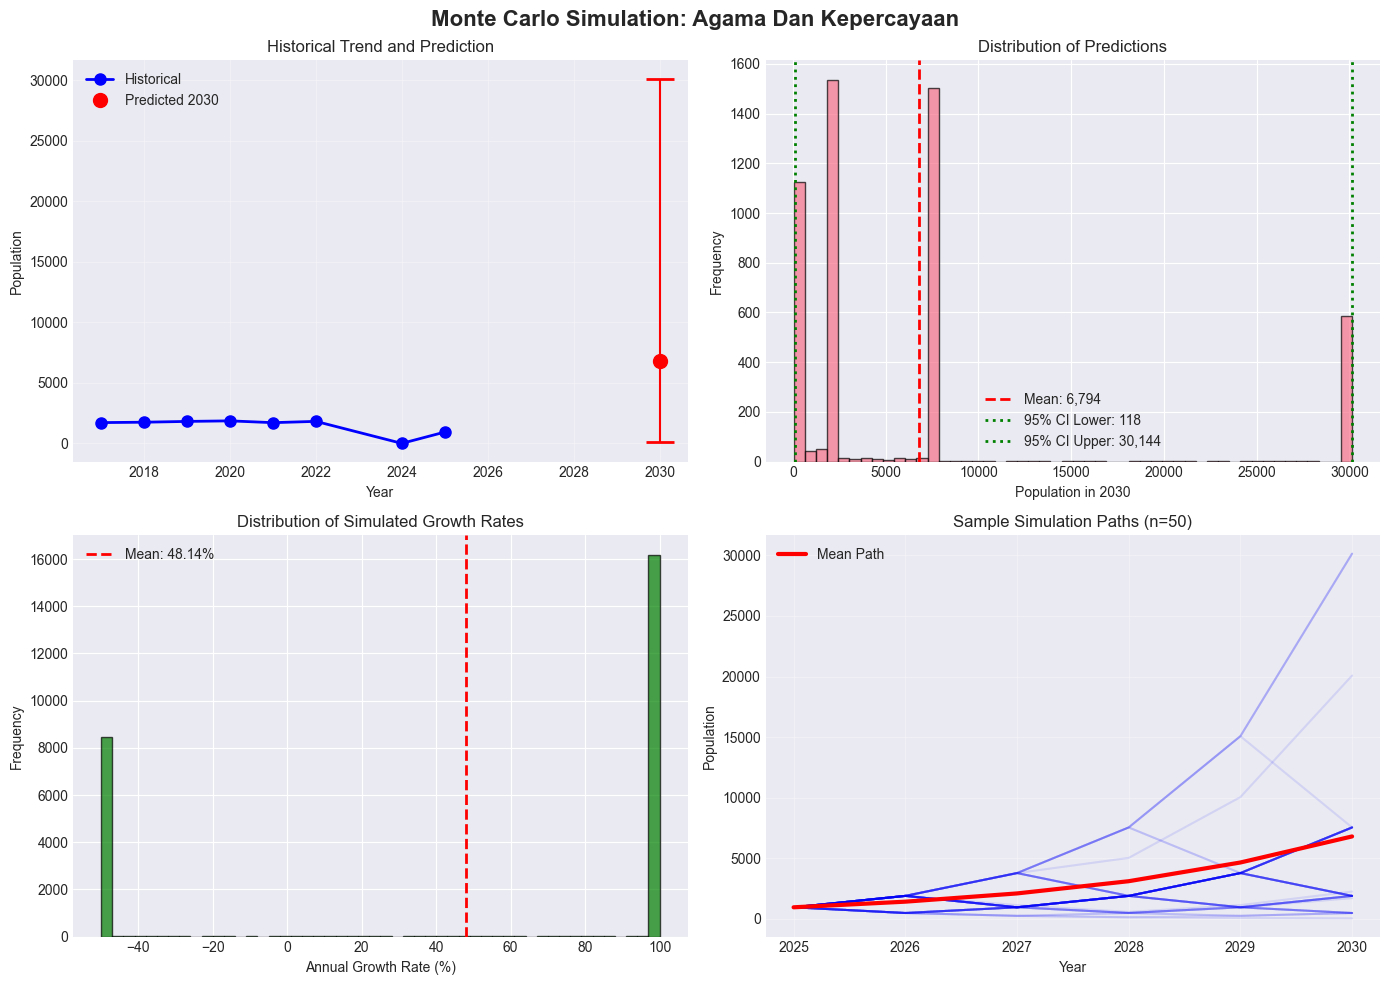

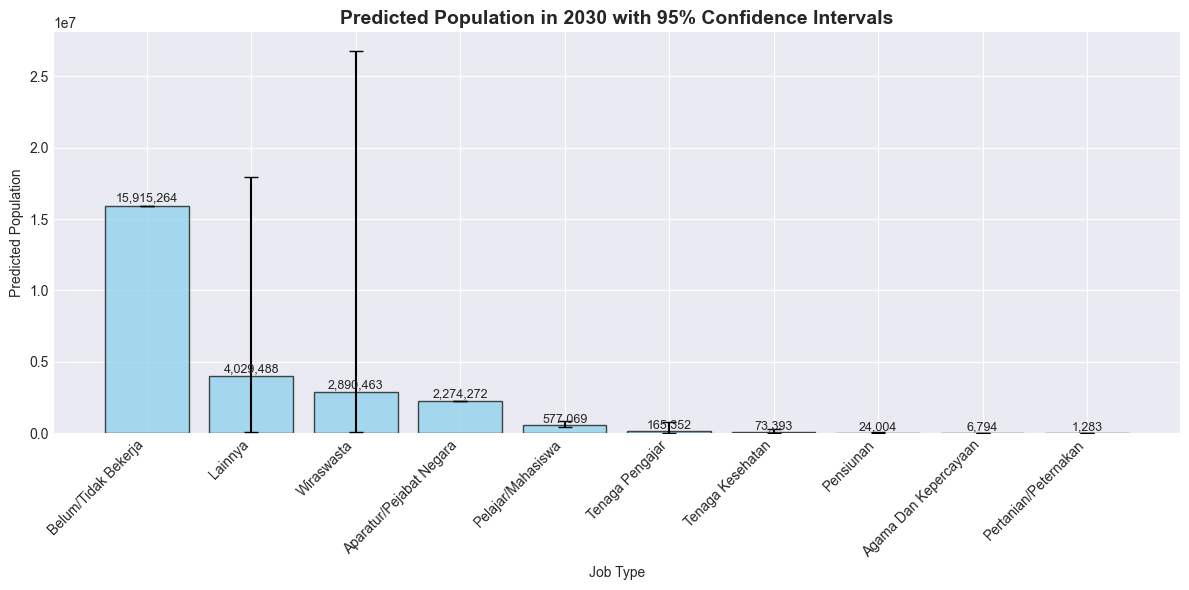

In [32]:
# %%
print("\nVISUALIZATION OF RESULTS")
print("=" * 50)

# %%
def visualize_predictions(predictor, job_type):
    """Visualisasi hasil prediksi untuk satu job type"""
    if job_type not in predictor.predictions:
        print(f"No predictions for {job_type}")
        return
    
    prediction_data = predictor.predictions[job_type]
    stats = prediction_data['stats']
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Monte Carlo Simulation: {job_type}', fontsize=16, fontweight='bold')
    
    # 1. Historical data and prediction
    ax1 = axes[0, 0]
    historical_stats = predictor.historical_stats[job_type]
    
    # Plot historical data
    ax1.plot(historical_stats['years'], historical_stats['populations'], 
             'bo-', linewidth=2, markersize=8, label='Historical')
    
    # Plot prediction point
    ax1.plot(stats['target_year'], stats['mean_prediction'], 
             'ro', markersize=10, label=f'Predicted {stats["target_year"]}')
    
    # Add confidence interval
    ax1.errorbar(stats['target_year'], stats['mean_prediction'],
                yerr=[[stats['mean_prediction'] - stats['ci_lower']], 
                      [stats['ci_upper'] - stats['mean_prediction']]],
                fmt='none', ecolor='red', capsize=10, capthick=2)
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Population')
    ax1.set_title('Historical Trend and Prediction')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Distribution of final predictions
    ax2 = axes[0, 1]
    final_predictions = prediction_data['simulations'][:, -1]
    
    ax2.hist(final_predictions, bins=50, edgecolor='black', alpha=0.7)
    ax2.axvline(stats['mean_prediction'], color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {stats["mean_prediction"]:,.0f}')
    ax2.axvline(stats['ci_lower'], color='green', linestyle=':', 
                linewidth=2, label=f'95% CI Lower: {stats["ci_lower"]:,.0f}')
    ax2.axvline(stats['ci_upper'], color='green', linestyle=':', 
                linewidth=2, label=f'95% CI Upper: {stats["ci_upper"]:,.0f}')
    
    ax2.set_xlabel(f'Population in {stats["target_year"]}')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of Predictions')
    ax2.legend()
    
    # 3. Growth rates distribution
    ax3 = axes[1, 0]
    growth_rates = prediction_data['growth_rates'].flatten() * 100  # Convert to percentage
    
    ax3.hist(growth_rates, bins=50, edgecolor='black', alpha=0.7, color='green')
    ax3.axvline(np.mean(growth_rates), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {np.mean(growth_rates):.2f}%')
    
    ax3.set_xlabel('Annual Growth Rate (%)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Distribution of Simulated Growth Rates')
    ax3.legend()
    
    # 4. Sample simulation paths
    ax4 = axes[1, 1]
    n_paths_to_show = 50
    
    for i in range(min(n_paths_to_show, prediction_data['simulations'].shape[0])):
        ax4.plot(range(stats['current_year'], stats['target_year'] + 1),
                 prediction_data['simulations'][i, :],
                 alpha=0.1, color='blue')
    
    # Plot mean path
    mean_path = np.mean(prediction_data['simulations'], axis=0)
    ax4.plot(range(stats['current_year'], stats['target_year'] + 1),
             mean_path, 'r-', linewidth=3, label='Mean Path')
    
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Population')
    ax4.set_title(f'Sample Simulation Paths (n={n_paths_to_show})')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# %%
# Visualisasi untuk sample job
if sample_prediction:
    visualize_predictions(predictor, sample_job)

# %%
# Visualisasi perbandingan semua prediksi
if not all_predictions_df.empty:
    plt.figure(figsize=(12, 6))
    
    # Sort by predicted value
    sorted_df = all_predictions_df.sort_values('mean_prediction', ascending=False)
    
    x_pos = range(len(sorted_df))
    bars = plt.bar(x_pos, sorted_df['mean_prediction'], 
                   color='skyblue', edgecolor='black', alpha=0.7)
    
    # Add error bars for confidence intervals
    errors = [(sorted_df['mean_prediction'] - sorted_df['ci_lower']).values,
              (sorted_df['ci_upper'] - sorted_df['mean_prediction']).values]
    
    plt.errorbar(x_pos, sorted_df['mean_prediction'], 
                 yerr=errors, fmt='none', ecolor='black', capsize=5)
    
    plt.title('Predicted Population in 2030 with 95% Confidence Intervals', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Job Type')
    plt.ylabel('Predicted Population')
    plt.xticks(x_pos, sorted_df['job_type'], rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, value in zip(bars, sorted_df['mean_prediction']):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                 f'{value:,.0f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

In [33]:
# %%
print("\nADDITIONAL ANALYSIS AND INSIGHTS")
print("=" * 50)

# %%
# 1. Analisis perubahan ranking pekerjaan
print("\nJob Ranking Analysis:")
current_year = df_agg['tahun'].max()

# Ranking saat ini
current_ranking = df_agg[df_agg['tahun'] == current_year] \
    .nlargest(10, 'jumlah_penduduk')[['jenis_pekerjaan', 'jumlah_penduduk']]
current_ranking['current_rank'] = range(1, len(current_ranking) + 1)

# Prediksi ranking di 2030
if not all_predictions_df.empty:
    predicted_ranking = all_predictions_df.nlargest(10, 'mean_prediction')[['job_type', 'mean_prediction']]
    predicted_ranking['predicted_rank'] = range(1, len(predicted_ranking) + 1)
    
    # Gabungkan ranking
    ranking_comparison = pd.merge(
        current_ranking, 
        predicted_ranking, 
        left_on='jenis_pekerjaan', 
        right_on='job_type',
        how='outer'
    )
    
    ranking_comparison = ranking_comparison[['jenis_pekerjaan', 'current_rank', 'predicted_rank']]
    ranking_comparison['rank_change'] = ranking_comparison['current_rank'] - ranking_comparison['predicted_rank']
    
    print("\nRanking Comparison (Top 10):")
    display(ranking_comparison.fillna('-'))
    
    # Identifikasi pekerjaan yang naik ranking
    rising_jobs = ranking_comparison[ranking_comparison['rank_change'] > 0]
    if not rising_jobs.empty:
        print(f"\nRising Jobs (improving rank):")
        for _, row in rising_jobs.iterrows():
            print(f"   {row['jenis_pekerjaan']}: ↑{int(row['rank_change'])} positions")

# %%
# 2. Analisis share/persentase
print("\nMarket Share Analysis:")
first_year = df_agg['tahun'].min()
last_year = df_agg['tahun'].max()

# Hitung share di tahun pertama dan terakhir
first_year_total = df_agg[df_agg['tahun'] == first_year]['jumlah_penduduk'].sum()
last_year_total = df_agg[df_agg['tahun'] == last_year]['jumlah_penduduk'].sum()

first_year_shares = df_agg[df_agg['tahun'] == first_year].copy()
first_year_shares['share'] = (first_year_shares['jumlah_penduduk'] / first_year_total) * 100

last_year_shares = df_agg[df_agg['tahun'] == last_year].copy()
last_year_shares['share'] = (last_year_shares['jumlah_penduduk'] / last_year_total) * 100

# Gabungkan dan hitung perubahan share
share_comparison = pd.merge(
    first_year_shares[['jenis_pekerjaan', 'share']].rename(columns={'share': 'initial_share'}),
    last_year_shares[['jenis_pekerjaan', 'share']].rename(columns={'share': 'final_share'}),
    on='jenis_pekerjaan',
    how='inner'
)

share_comparison['share_change'] = share_comparison['final_share'] - share_comparison['initial_share']

print(f"\nTop 5 Jobs with Increasing Market Share:")
top_gainers = share_comparison.nlargest(5, 'share_change')
for _, row in top_gainers.iterrows():
    print(f"   {row['jenis_pekerjaan']}: +{row['share_change']:.2f}% points "
          f"({row['initial_share']:.1f}% → {row['final_share']:.1f}%)")

# %%
# 3. Prediksi total pekerjaan di 2030
print("\nTotal Employment Prediction for 2030:")

if not all_predictions_df.empty:
    # Prediksi total dari top jobs
    predicted_total = all_predictions_df['mean_prediction'].sum()
    
    # Hitung share dari top jobs di tahun terakhir
    last_year_top_total = df_agg[
        (df_agg['tahun'] == last_year) & 
        (df_agg['jenis_pekerjaan'].isin(all_predictions_df['job_type']))
    ]['jumlah_penduduk'].sum()
    
    last_year_all_total = df_agg[df_agg['tahun'] == last_year]['jumlah_penduduk'].sum()
    top_jobs_share = (last_year_top_total / last_year_all_total) * 100
    
    # Estimasikan total semua pekerjaan
    estimated_total = predicted_total / (top_jobs_share / 100)
    
    print(f"   Predicted total from top {len(all_predictions_df)} jobs: {predicted_total:,.0f}")
    print(f"   Share of top jobs in {last_year}: {top_jobs_share:.1f}%")
    print(f"   Estimated total employment in 2030: {estimated_total:,.0f}")
    
    # CAGR untuk total employment
    current_total = last_year_all_total
    years = 2030 - last_year
    total_cagr = ((estimated_total / current_total) ** (1/years) - 1) * 100
    
    print(f"   Estimated CAGR for total employment: {total_cagr:.2f}%")


ADDITIONAL ANALYSIS AND INSIGHTS

Job Ranking Analysis:

Ranking Comparison (Top 10):


,jenis_pekerjaan,current_rank,predicted_rank,rank_change
0,Agama Dan Kepercayaan,10,9,1
1,Aparatur/Pejabat Negara,5,4,1
2,Belum/Tidak Bekerja,4,1,3
3,Lainnya,3,2,1
4,Pelajar/Mahasiswa,2,5,-3
5,Pensiunan,6,8,-2
6,Pertanian/Peternakan,9,10,-1
7,Tenaga Kesehatan,8,7,1
8,Tenaga Pengajar,7,6,1
9,Wiraswasta,1,3,-2



Rising Jobs (improving rank):
   Agama Dan Kepercayaan: ↑1 positions
   Aparatur/Pejabat Negara: ↑1 positions
   Belum/Tidak Bekerja: ↑3 positions
   Lainnya: ↑1 positions
   Tenaga Kesehatan: ↑1 positions
   Tenaga Pengajar: ↑1 positions

Market Share Analysis:

Top 5 Jobs with Increasing Market Share:
   Tenaga Pengajar: +0.12% points (0.8% → 0.9%)
   Tenaga Kesehatan: +0.10% points (0.3% → 0.4%)
   Agama Dan Kepercayaan: +0.00% points (0.0% → 0.0%)
   Nelayan: +-0.00% points (0.0% → 0.0%)
   Pensiunan: +-0.35% points (1.8% → 1.4%)

Total Employment Prediction for 2030:
   Predicted total from top 10 jobs: 25,957,382
   Share of top jobs in 2025: 100.0%
   Estimated total employment in 2030: 25,957,801
   Estimated CAGR for total employment: 58.44%


In [34]:
# %%
print("\nEXPORTING RESULTS")
print("=" * 50)

# %%
def export_results(predictor, df_agg, filename='monte_carlo_predictions.xlsx'):
    """Export hasil analisis ke Excel"""
    
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        # Sheet 1: Predictions
        if predictor.predictions:
            predictions_list = []
            for job, data in predictor.predictions.items():
                stats = data['stats']
                predictions_list.append({
                    'Job Type': stats['job_type'],
                    'Current Year': stats['current_year'],
                    'Current Population': stats['current_population'],
                    'Target Year': stats['target_year'],
                    'Predicted Population': stats['mean_prediction'],
                    'CAGR (%)': stats['cagr'],
                    'CI Lower': stats['ci_lower'],
                    'CI Upper': stats['ci_upper'],
                    'CI Width': stats['ci_upper'] - stats['ci_lower'],
                    'Std Deviation': stats['std_prediction']
                })
            
            predictions_df = pd.DataFrame(predictions_list)
            predictions_df.to_excel(writer, sheet_name='Predictions', index=False)
        
        # Sheet 2: Historical Data
        df_agg.to_excel(writer, sheet_name='Historical Data', index=False)
        
        # Sheet 3: Growth Statistics
        growth_stats = []
        for job, stats in predictor.historical_stats.items():
            growth_stats.append({
                'Job Type': job,
                'Mean Growth (%)': stats['mean_growth'] * 100,
                'Std Growth (%)': stats['std_growth'] * 100,
                'Current Population': stats['current_population'],
                'Number of Years': stats['n_years']
            })
        
        growth_df = pd.DataFrame(growth_stats)
        growth_df.to_excel(writer, sheet_name='Growth Statistics', index=False)
    
    print(f"Results exported to {filename}")

# %%
# Export hasil
export_results(predictor, df_agg, 'employment_predictions_kota_bandung.xlsx')

# %%
# Buat ringkasan dalam DataFrame untuk display
print("\nFINAL SUMMARY")
print("=" * 60)

if not all_predictions_df.empty:
    summary_df = all_predictions_df[[
        'job_type', 'mean_prediction', 'cagr', 'ci_lower', 'ci_upper'
    ]].copy()
    
    summary_df['prediction_range'] = summary_df.apply(
        lambda x: f"{x['ci_lower']:,.0f} - {x['ci_upper']:,.0f}", axis=1
    )
    
    summary_df = summary_df[['job_type', 'mean_prediction', 'prediction_range', 'cagr']]
    summary_df.columns = ['Job Type', 'Predicted 2030', '95% CI Range', 'CAGR (%)']
    
    print("\nPrediction Summary (Top Jobs):")
    display(summary_df)


EXPORTING RESULTS
Results exported to employment_predictions_kota_bandung.xlsx

FINAL SUMMARY

Prediction Summary (Top Jobs):


,Job Type,Predicted 2030,95% CI Range,CAGR (%)
0,Wiraswasta,2.890463e+06,"104,450 - 26,739,104",28.172276
1,Pelajar/Mahasiswa,5.770691e+05,"461,305 - 827,459",0.513977
2,Lainnya,4.029488e+06,"70,092 - 17,943,680",48.353455
3,Belum/Tidak Bekerja,1.591526e+07,"15,915,264 - 15,915,264",100.000000
4,Aparatur/Pejabat Negara,2.274272e+06,"2,274,272 - 2,274,272",100.000000
5,Pensiunan,2.400417e+04,"9,648 - 74,046",-8.090352
6,Tenaga Pengajar,1.653515e+05,"2,955 - 756,448",47.555640
7,Tenaga Kesehatan,7.339275e+04,"1,248 - 319,488",49.028634
8,Pertanian/Peternakan,1.283289e+03,"1,021 - 1,799",-0.426363
9,Agama Dan Kepercayaan,6.794273e+03,"118 - 30,144",48.463065
